<a href="https://colab.research.google.com/github/nanochiplab/Veri-Madenciligi/blob/main/Final_Proje_VeriMadencili%C4%9Fi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import warnings

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [8]:
!git clone https://github.com/nanochiplab/Veri-Madenciligi
%cd Veri-Madenciligi/

data = pd.read_excel("Pesticide_dataset.xlsx")

Cloning into 'Veri-Madenciligi'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 1003.62 KiB | 4.82 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/Veri-Madenciligi/Veri-Madenciligi


In [9]:
# Ver setini yükleme
#data = pd.read_excel('Pesticide_dataset.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             680 non-null    float64
 1   LungCA                         680 non-null    int64  
 2   Gender                         680 non-null    int64  
 3   age                            680 non-null    int64  
 4   age_group                      680 non-null    int64  
 5   Cigarette_total                680 non-null    int64  
 6   Herbicide_day                  680 non-null    int64  
 7   Insecticides_Days_432          680 non-null    int64  
 8   Fungicides_Days_433            680 non-null    int64  
 9   Glyphosate_days                680 non-null    int64  
 10  Paraquat_days                  680 non-null    int64  
 11  two_four_Dichlorophenoxy_days  680 non-null    int64  
 12  Butachlor_Days                 680 non-null    int

In [10]:
data.head()

,ID,LungCA,Gender,age,age_group,Cigarette_total,Herbicide_day,Insecticides_Days_432,Fungicides_Days_433,Glyphosate_days,...,Dieldrin_days,DDT_days,Chlorpylifos_days,Folidol_days,Mevinphos_days,Carbaryl_Savins_days,Carbofuran_days,Abamectin_days,Armure_Propiconazole_days,Metal_aldehyde_days
0,1.0,1,1,75,4,0,2000,600,0,0,...,0,800,0,0,0,0,0,0,0,0
1,1.1,0,1,70,3,0,150,300,50,0,...,0,0,200,0,0,0,0,0,0,0
2,1.2,0,1,72,3,0,90,135,0,0,...,0,0,0,135,0,0,0,0,0,0
3,2.0,1,0,58,2,246375,840,520,0,0,...,0,0,0,0,480,0,480,0,0,0
4,2.1,0,0,55,2,0,1600,1300,0,160,...,1395,0,1200,0,0,0,0,0,0,0


In [19]:
# Set the default Seaborn style
sns.set_theme(style='whitegrid', font='serif')

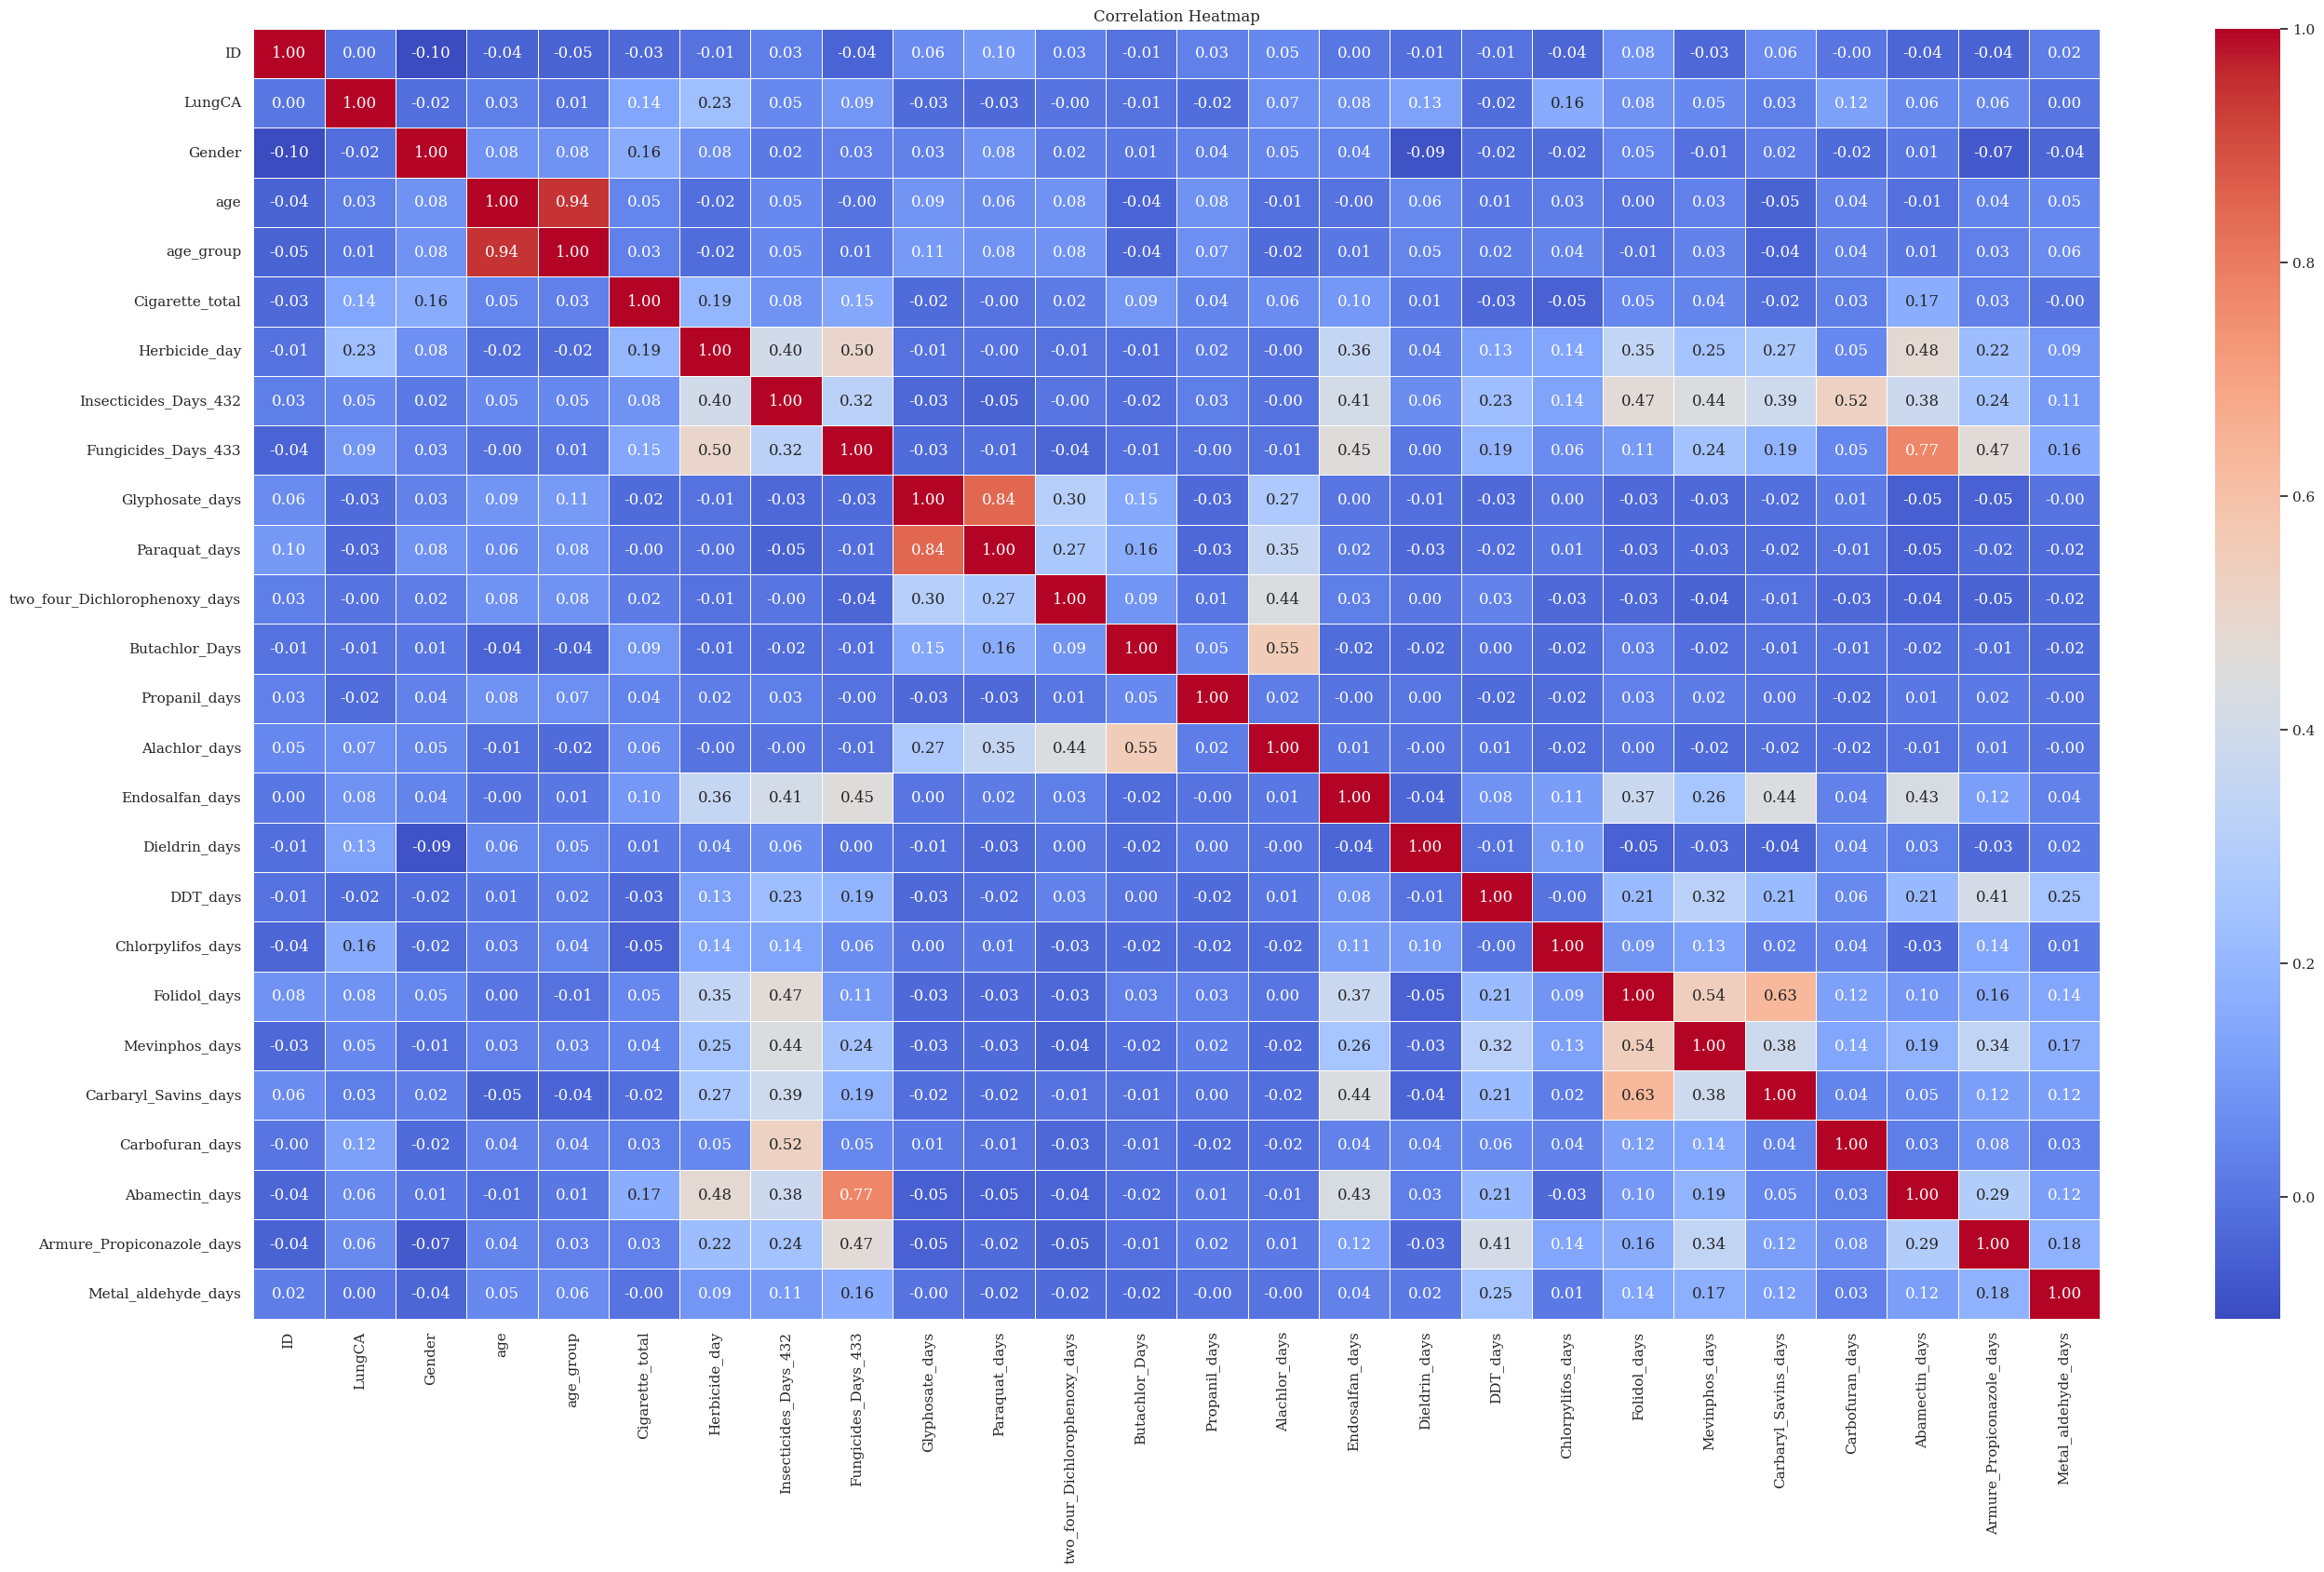

In [20]:
#KORRELASYON ISI HARİTASI
plt.figure(figsize=(32, 18))

corr_mat = data.corr(numeric_only=True)

sns.heatmap(corr_mat, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap')

plt.show()

In [21]:
#MODELİ YAPILANDIRMA
# Separate features and target variable
X = data.drop(['LungCA','age','age_group','ID', 'Gender'], axis=1)
y = data['LungCA']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
#RANDOM FOREST MODELİ
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_train_pred = rf_model.predict(X_train)

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['Kanser Değil', 'Kanser'])

# Display the classification report
print(report)

              precision    recall  f1-score   support

Kanser Değil       0.67      0.82      0.74        80
      Kanser       0.62      0.41      0.49        56

    accuracy                           0.65       136
   macro avg       0.64      0.62      0.62       136
weighted avg       0.65      0.65      0.64       136



In [24]:
accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)

print(f'Random Forest Model Accuracy: {accuracy:.3f}%')
print(f'Random Forest Model Train Accuracy: {train_accuracy:.3f}%')

Random Forest Model Accuracy: 0.654%
Random Forest Model Train Accuracy: 0.943%


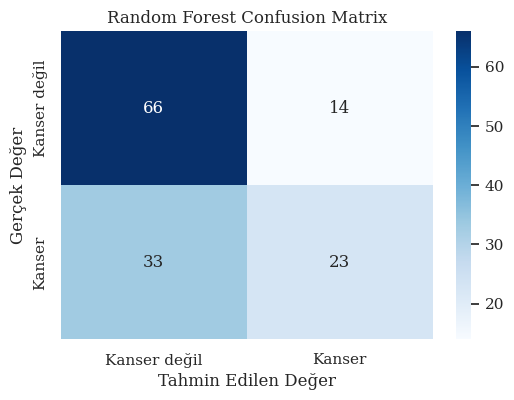

In [25]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Kanser değil', 'Kanser'], yticklabels=['Kanser değil', 'Kanser'])

# Set the title and labels
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Tahmin Edilen Değer')
plt.ylabel('Gerçek Değer')

# Preview the plot
plt.show()

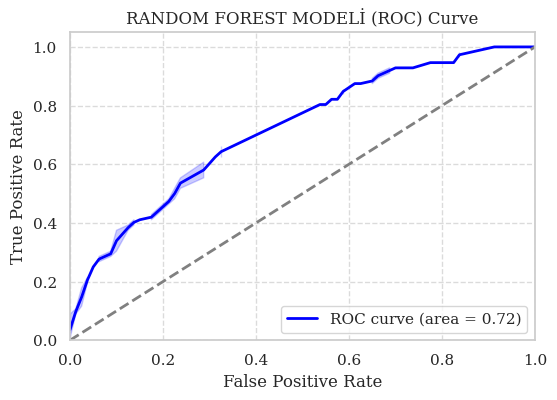

In [27]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
sns.lineplot(x=fpr, y=tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
sns.lineplot(x=[0, 1], y=[0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Set the title and labels
plt.title('RANDOM FOREST MODELİ (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Add legend
plt.legend(loc='lower right')

# Add grid for better readability
plt.grid(linestyle='--', alpha=0.7)

# Preview the plot
plt.show()

In [28]:
#LOGİC REGRESYON BAŞLATMA
# Initialize the Logistic Regression Classifier with a different solver
lr_model = LogisticRegression(random_state=42, solver='liblinear')

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

In [29]:
# Generate the classification report
lr_report = classification_report(y_test, y_pred, target_names=['Kanser değil', 'Kanser'])
print("Logistic Regression Classification Report:")
print(lr_report)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

Kanser değil       0.63      0.89      0.74        80
      Kanser       0.61      0.25      0.35        56

    accuracy                           0.62       136
   macro avg       0.62      0.57      0.55       136
weighted avg       0.62      0.62      0.58       136



In [30]:
# Calculate and display the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Model Accuracy: {accuracy:.3f} or {accuracy * 100:.3f}%')

Logistic Regression Model Accuracy: 0.625 or 62.500%


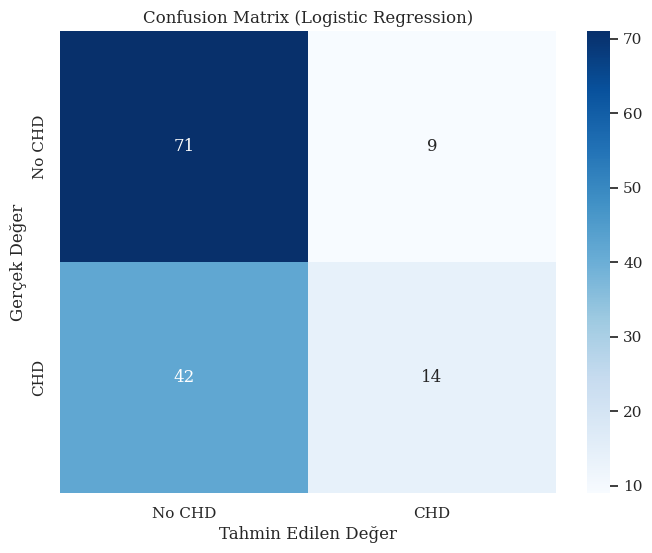

In [31]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No CHD', 'CHD'], yticklabels=['No CHD', 'CHD'])

# Set title and labels
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Tahmin Edilen Değer')
plt.ylabel('Gerçek Değer')

# Preview the plot
plt.show()

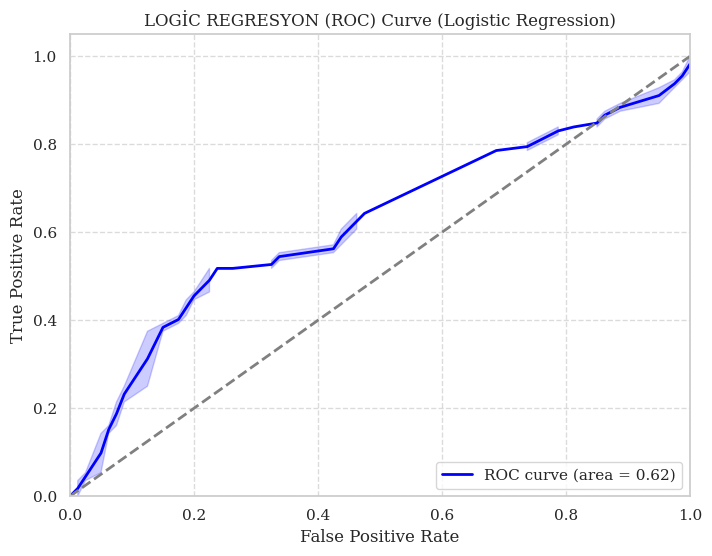

In [32]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr, y=tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
sns.lineplot(x=[0, 1], y=[0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Set the title and labels
plt.title('LOGİC REGRESYON (ROC) Curve (Logistic Regression)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Add legend
plt.legend(loc='lower right')

# Add grid for better readability
plt.grid(linestyle='--', alpha=0.7)

# Preview the plot
plt.show()

In [33]:
#Gradient Boosting MODELİ
# Initialize the Gradient Boosting Classifier
gbm_model = GradientBoostingClassifier(random_state=42)

# Train the model
gbm_model.fit(X_train, y_train)

# Make predictions
y_pred = gbm_model.predict(X_test)
y_train_pred = gbm_model.predict(X_train)

In [34]:
# Generate the classification report
gbm_report = classification_report(y_test, y_pred, target_names=['Kanser değil', 'Kanser'])
print("Gradient Boosting Classification Report:")
print(gbm_report)

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

Kanser değil       0.69      0.96      0.81        80
      Kanser       0.88      0.39      0.54        56

    accuracy                           0.73       136
   macro avg       0.79      0.68      0.67       136
weighted avg       0.77      0.73      0.70       136



In [35]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Gradient Boosting Model Accuracy: {accuracy:.3f}%')

Gradient Boosting Model Accuracy: 0.728%


In [56]:
#CROSS VALIDATION YAPILIYOR....
# KFold nesnesini oluşturun (örneğin, 5 kat)
kf = KFold(n_splits=5)

# Katlar üzerinde yineleyin
for train_index, test_index in kf.split(X):
    # Eğitim ve test verilerini alın
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] # Use .iloc for row-based indexing
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] # Use .iloc for row-based indexing

    # Modeli eğitiyoruz
    gbm_model.fit(X_train, y_train)

    # Modeli test edin ve puanı yazdırın
    score = gbm_model.score(X_test, y_test)
    print(score)

# Çapraz doğrulamayı gerçekleştirin (örneğin, 5 kat)
scores = cross_val_score(gbm_model, X, y, cv=5)
print()
# Ortalama puanı yazdırın
print("Ortalama puan:", scores.mean())

# Standart sapmayı yazdırın
print("Standart sapma:", scores.std())

0.7573529411764706
0.6838235294117647
0.75
0.6985294117647058
0.7573529411764706

Ortalama puan: 0.725
Standart sapma: 0.04277364580073233


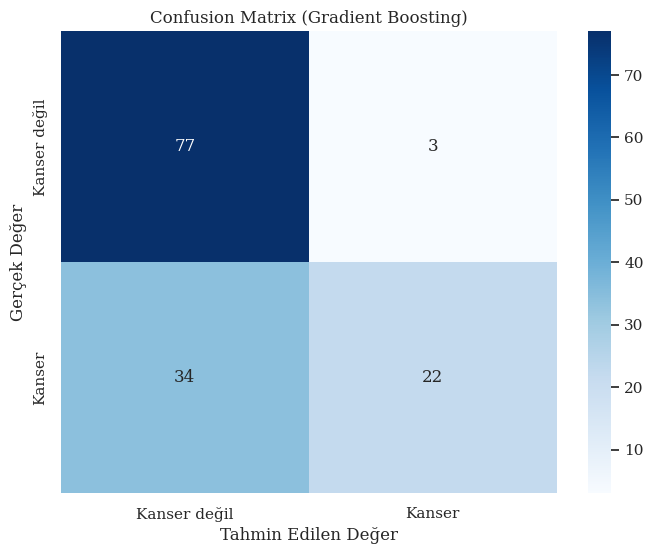

In [36]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Kanser değil', 'Kanser'], yticklabels=['Kanser değil', 'Kanser'])

# Set title and labels
plt.title('Confusion Matrix (Gradient Boosting)')
plt.xlabel('Tahmin Edilen Değer')
plt.ylabel('Gerçek Değer')

# Preview the plot
plt.show()

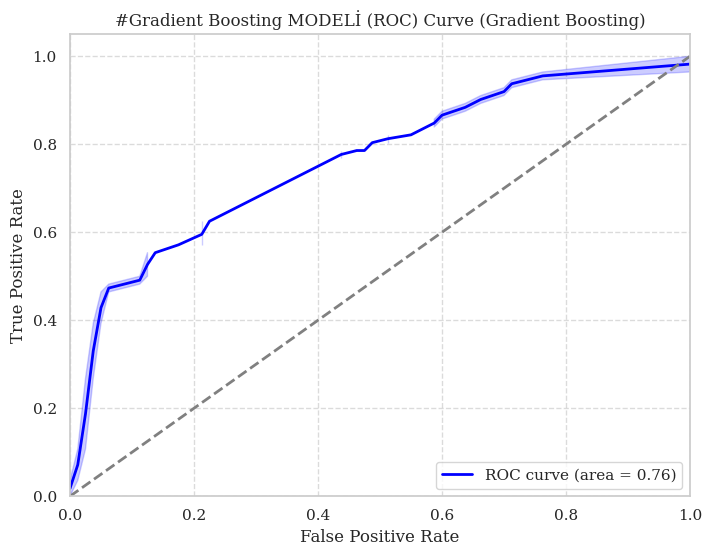

In [37]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, gbm_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr, y=tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
sns.lineplot(x=[0, 1], y=[0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Set title and labels
plt.title('#Gradient Boosting MODELİ (ROC) Curve (Gradient Boosting)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Add legend
plt.legend(loc='lower right')

# Add grid for better readability
plt.grid(linestyle='--', alpha=0.7)

# Preview the plot
plt.show()

In [38]:
#Support Vector Machines MODELİ
# Initialize the SVM Classifier
svm_model = SVC(probability=True, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

In [39]:
# Generate the classification report with zero_division=0
svm_report = classification_report(y_test, y_pred, target_names=['Kanser değil', 'Kanser'], zero_division=0)
print("SVM Classification Report:")
print(svm_report)

SVM Classification Report:
              precision    recall  f1-score   support

Kanser değil       0.61      1.00      0.75        80
      Kanser       1.00      0.07      0.13        56

    accuracy                           0.62       136
   macro avg       0.80      0.54      0.44       136
weighted avg       0.77      0.62      0.50       136



In [40]:
# Calculate and display the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Model Accuracy: {accuracy:.3f} or {accuracy * 100:.3f}%')

SVM Model Accuracy: 0.618 or 61.765%


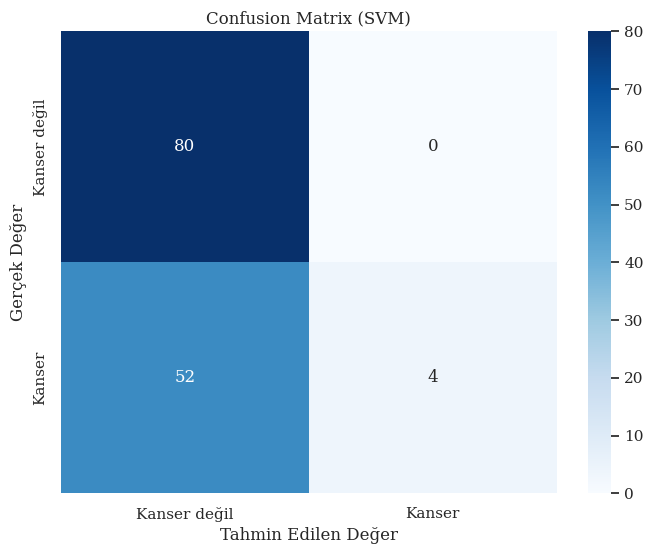

In [41]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Kanser değil', 'Kanser'], yticklabels=['Kanser değil', 'Kanser'])

# Set title and labels
plt.title('Confusion Matrix (SVM)')
plt.xlabel('Tahmin Edilen Değer')
plt.ylabel('Gerçek Değer')

# Preview the plot
plt.show()

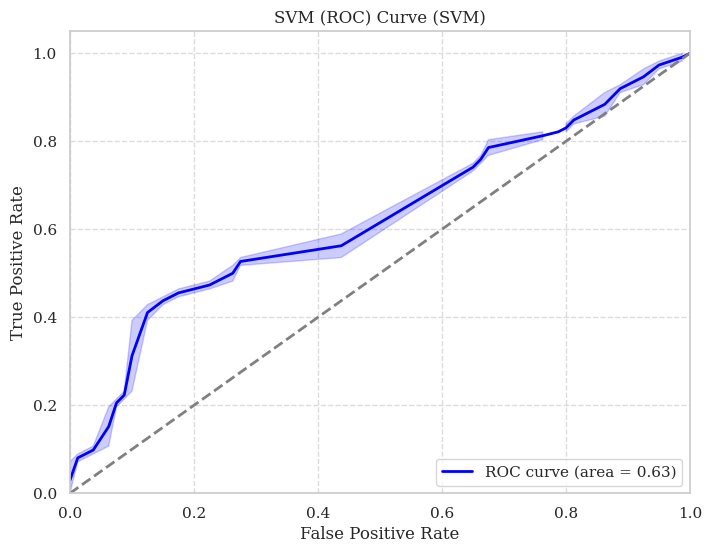

In [42]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, svm_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr, y=tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
sns.lineplot(x=[0, 1], y=[0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Set title and labels
plt.title('SVM (ROC) Curve (SVM)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Add legend
plt.legend(loc='lower right')

# Add grid for better readability
plt.grid(linestyle='--', alpha=0.7)

# Preview the plot
plt.show()

In [43]:
naive_bayes_model = GaussianNB()

# Train the model
naive_bayes_model.fit(X_train, y_train)

# Make predictions
y_pred = naive_bayes_model.predict(X_test)

In [44]:
# Doğruluk puanını yazdırın
accuracy = accuracy_score(y_test, y_pred)
print(f'Naive Bayes Model Accuracy: {accuracy:.3f} or {accuracy * 100:.3f}%')

# Sınıflandırma raporunu yazdırın
report = classification_report(y_test, y_pred, target_names=['Kanser Değil', 'Kanser'])
print(report)

Naive Bayes Model Accuracy: 0.654 or 65.441%
              precision    recall  f1-score   support

Kanser Değil       0.65      0.88      0.75        80
      Kanser       0.66      0.34      0.45        56

    accuracy                           0.65       136
   macro avg       0.65      0.61      0.60       136
weighted avg       0.65      0.65      0.62       136



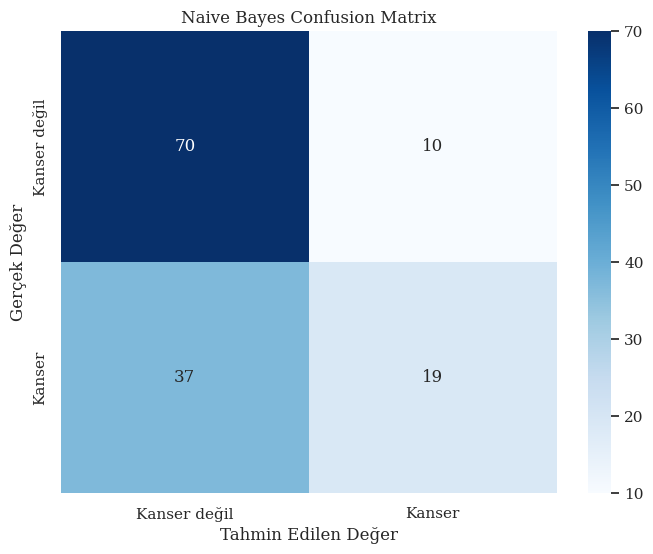

In [45]:
# Karışıklık matrisini yazdırın
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Kanser değil', 'Kanser'], yticklabels=['Kanser değil', 'Kanser'])

# Set title and labels
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Tahmin Edilen Değer')
plt.ylabel('Gerçek Değer')

# Preview the plot
plt.show()

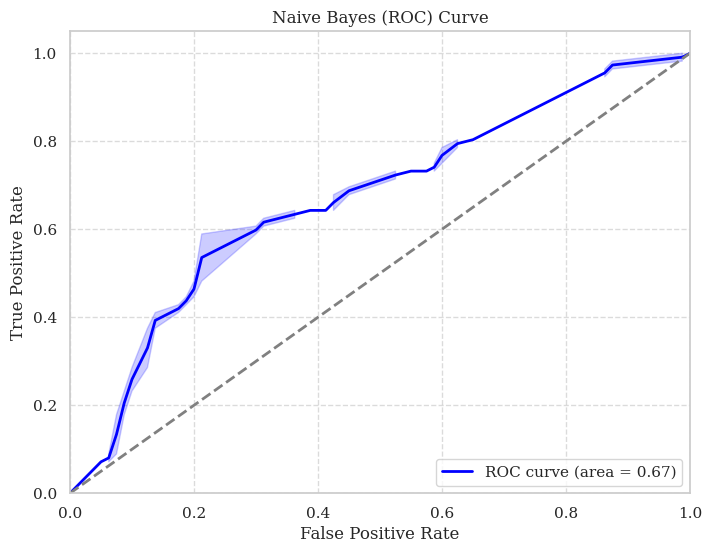

In [46]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, naive_bayes_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr, y=tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
sns.lineplot(x=[0, 1], y=[0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Set title and labels
plt.title('Naive Bayes (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Add legend
plt.legend(loc='lower right')

# Add grid for better readability
plt.grid(linestyle='--', alpha=0.7)

# Preview the plot
plt.show()

In [47]:
def calculate_metrics(y_true, y_pred, y_prob):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    auc = roc_auc_score(y_true, y_prob)
    return accuracy, precision, recall, f1, auc

In [48]:
#Model Comparison
# List of models and their corresponding names
models = [
    ('Random Forest', rf_model),
    ('Logistic Regression', lr_model),
    ('Gradient Boosting', gbm_model),
    ('SVM', svm_model),
    ('Naive Bayes', naive_bayes_model),
]

# Initialize an empty list to store metrics
metrics_list = []

In [ ]:
# Loop through each model
for model_name, model in models:
    # Make predictions and get probabilities
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy, precision, recall, f1, auc = calculate_metrics(y_test, y_pred, y_prob)

    # Calculate Accuracy (%)
    accuracy_percent = accuracy * 100

    # Append the metrics to the list
    metrics_list.append([model_name, accuracy, accuracy_percent, precision, recall, f1, auc])
    # Convert the list to a DataFrame
metrics_df = pd.DataFrame(metrics_list, columns=['Model', 'Accuracy', 'Accuracy (%)', 'Precision', 'Recall', 'F1-Score', 'AUC'])

# Display the metrics table
metrics_df


,Model,Accuracy,Accuracy (%),Precision,Recall,F1-Score,AUC
0,Random Forest,0.696078,69.607843,0.634146,0.356164,0.456140,0.719126
1,Logistic Regression,0.681373,68.137255,0.625000,0.273973,0.380952,0.617641
2,Gradient Boosting,0.759804,75.980392,0.852941,0.397260,0.542056,0.741242
3,SVM,0.642157,64.215686,0.500000,0.013699,0.026667,0.623811
4,Naive Bayes,0.705882,70.588235,0.644444,0.397260,0.491525,0.672854


In [ ]:
#Hyperparameter Tuning
# # Define the parameter grid
param_grid = {
     'n_estimators': [50,100, 200],
     'learning_rate': [0.1, 0.2,0.4],
     'max_depth': [1,3, 5],
     'min_samples_split': [2, 5, 10],
     'min_samples_leaf': [2, 4,10]
 }

# # Initialize the Grid Search
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='f1')

# # Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# # Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

In [ ]:
best_params = {'learning_rate': 0.4, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}

In [ ]:
# Train the model with the best parameters
best_gbm_model = GradientBoostingClassifier(**best_params, random_state=42)
best_gbm_model.fit(X_train, y_train)

# Make predictions
y_pred = best_gbm_model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, best_gbm_model.predict_proba(X_test)[:, 1])

print(f"Optimized Gradient Boosting Model Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

Optimized Gradient Boosting Model Metrics:
Accuracy: 0.6961
Precision: 0.6170
Recall: 0.3973
F1-Score: 0.4833
AUC: 0.6866


In [ ]:
# List of models and their corresponding names
models = [
    ('Random Forest', rf_model),
    ('Logistic Regression', lr_model),
    ('Gradient Boosting', gbm_model),
    ('SVM', svm_model),
    ('(Hyperparamter Tuned) Gradient Boosting', best_gbm_model)
]

# Initialize an empty list to store metrics
metrics_list = []

In [ ]:
# Loop through each model
for model_name, model in models:
    # Make predictions and get probabilities
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy, precision, recall, f1, auc = calculate_metrics(y_test, y_pred, y_prob)

    # Calculate Accuracy (%)
    accuracy_percent = accuracy * 100

    # Append the metrics to the list
    metrics_list.append([model_name, accuracy, accuracy_percent, precision, recall, f1, auc])

# Convert the list to a DataFrame
metrics_df = pd.DataFrame(metrics_list, columns=['Model', 'Accuracy', 'Accuracy (%)', 'Precision', 'Recall', 'F1-Score', 'AUC'])

# Display the metrics table
metrics_df

,Model,Accuracy,Accuracy (%),Precision,Recall,F1-Score,AUC
0,Random Forest,0.696078,69.607843,0.634146,0.356164,0.456140,0.719126
1,Logistic Regression,0.681373,68.137255,0.625000,0.273973,0.380952,0.617641
2,Gradient Boosting,0.759804,75.980392,0.852941,0.397260,0.542056,0.741242
3,SVM,0.642157,64.215686,0.500000,0.013699,0.026667,0.623811
4,(Hyperparamter Tuned) Gradient Boosting,0.730392,73.039216,0.736842,0.383562,0.504505,0.707100
